# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [1]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [2]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [3]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([1, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [4]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



The following is a basic example for binary classification



We can use a more readable and visual way as follows:

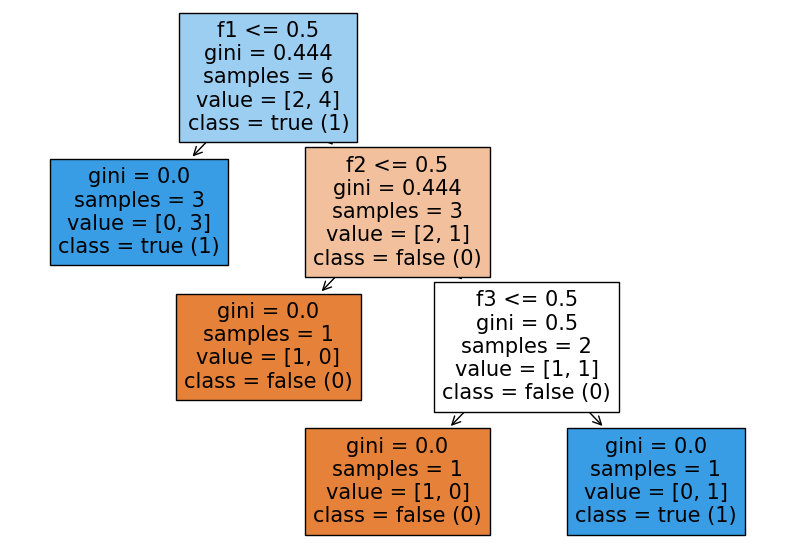

In [5]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                    feature_names= ("f1","f2" , "f3", "f4"),
                    class_names= ("false (0)", "true (1)" ), 
                    filled=True)


Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. 


Number of leaves: 4
Depth of tree: 3


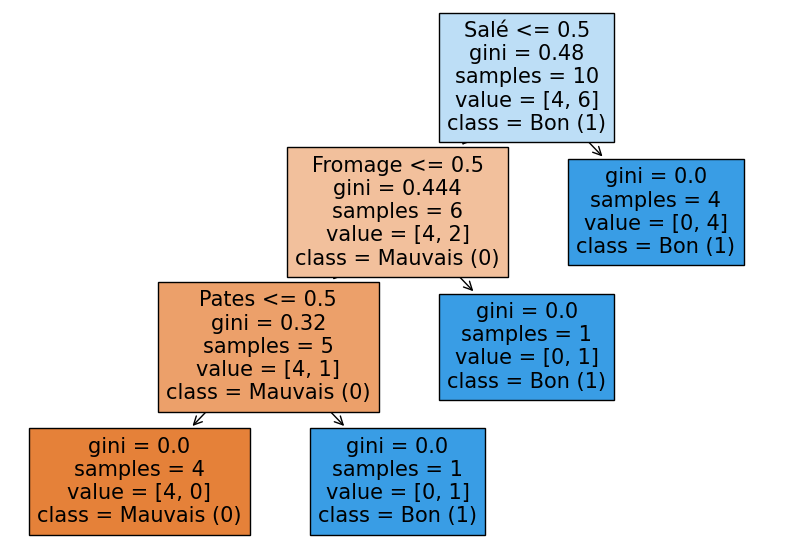

In [6]:
# Each example in X has 8 binary features
X = [[0, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 0, 0, 1, 1] ,[1, 1, 1, 1, 0, 0, 1, 0] , [1, 1, 1, 0, 0, 0, 1, 1] , [1, 0, 0, 0, 1, 1, 1, 0] , [1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0]]

# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [0, 1, 1 , 1, 0, 1, 1, 1, 0, 0]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

print("Number of leaves: %d" % clf.get_n_leaves())
print("Depth of tree: %d" % clf.get_depth())

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                    feature_names= ("Chaud","Salé", "Plat", "Fromage", "Brulé", "Périmé", "Épicé", "Pates"),
                    class_names= ("Mauvais (0)", "Bon (1)" ), 
                    filled=True)






## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
- How many examples in the dataset?
- What are your expectations regarding the most important features? 
- Propose (informally) a way to reduce the dataset
- There many ways to binarize the dataset. How do you propose to do so?



Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset compass.csv
- The set of tools utils.py

Load the binary dataset `compass.csv` as follows 

In [7]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

#features names
print(features)
print(len(features))
#number of examples in the dataset
print(len(train_examples))



['race_African-American', 'race_Caucasian', 'gender_Female', 'gender_Male', 'age_18-20', 'age_21-22', 'age_23-25', 'age_26-45', 'age_>45', 'juvenile-felonies_=0', 'juvenile-felonies_>0', 'juvenile-misdemeanors_=0', 'juvenile-misdemeanors_>0', 'juvenile-crimes_=0', 'juvenile-crimes_>0', 'priors_0', 'priors_1', 'priors_2-3', 'priors_>3', 'charge_degree_Misdemeanor', 'charge_degree_Felony', 'not_gender_Female', 'not_gender_Male', 'not_age_18-20', 'not_age_21-22', 'not_age_23-25', 'not_age_26-45', 'not_age_>45', 'not_juvenile-felonies_=0', 'not_juvenile-felonies_>0', 'not_juvenile-misdemeanors_=0', 'not_juvenile-misdemeanors_>0', 'not_juvenile-crimes_=0', 'not_juvenile-crimes_>0', 'not_priors_0', 'not_priors_1', 'not_priors_2-3', 'not_priors_>3', 'not_charge_degree_Misdemeanor', 'not_charge_degree_Felony', 'juvenile-misdemeanors_=0__AND__juvenile-felonies_=0', 'gender_Male__AND__juvenile-felonies_=0', 'gender_Male__AND__juvenile-misdemeanors_=0', 'gender_Male__AND__juvenile-crimes_=0', 'ju

<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">


- What are the features? 
165 features printed


- How many examples in the dataset? 
There are 5273 examples in the dataset 


- What are your expectations regarding the most important features? 
The most important feature will determine easily the target. If a feature is important, the answer of it will have more impact or clearly determines the target (more thann indecisive features that can have 50/50 on the target answer).


- Propose (informally) a way to reduce the dataset: 
We could take out the redundant features and examples. some features are the inverse of some others and with the binary answers, they are already cared for. for example  we don't need to have "ot_age_23-25" tand"age_23-25" . if there are features thatidescribe the same qualities, they can be taken out. features (like "charge_degree_Felony__AND__juvenile-crimes_=0") that are combination of other ones are also redundant. if some examples are present several time in the dataset with the same result, they could be taken out.


- There many ways to binarize the dataset. How do you propose to do so?
We have to select a threshold value, and then converting all the values below the threshold to 0 and all the values above the threshold to 1.
</div>

Inspect each of these 4 objects. What do they represent? How many features? examples? 

Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter
- max_depth 
- min_samples_leaf 

What do they represent? 

In [8]:
#train_examples, train_labels, features, prediction
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)

#fig = plt.figure(figsize=(10,7))
#_ = tree.plot_tree(clf, 
#                    feature_names= (features),
#                    class_names= (prediction ), 
#                    filled=True)

text_representation = tree.export_text(clf, feature_names=features)
print(text_representation)

print(len(features))
print(len(train_examples))

#splitter
print("splitter : ", clf.splitter)

#max_depth
print("max_depth :", clf.max_depth)

#min_samples_leaf
print("min_samples_leaf :", clf.min_samples_leaf)

|--- not_priors_>3 <= 0.50
|   |--- age_>45__AND__juvenile-crimes_=0 <= 0.50
|   |   |--- age_26-45__AND__juvenile-crimes_=0 <= 0.50
|   |   |   |--- juvenile-misdemeanors_=0__AND__gender_Female <= 0.50
|   |   |   |   |--- juvenile-crimes_=0__AND__gender_Female <= 0.50
|   |   |   |   |   |--- race_Caucasian <= 0.50
|   |   |   |   |   |   |--- juvenile-misdemeanors_>0__AND__charge_degree_Misdemeanor <= 0.50
|   |   |   |   |   |   |   |--- juvenile-felonies_=0__AND__juvenile-misdemeanors_>0 <= 0.50
|   |   |   |   |   |   |   |   |--- age_23-25__AND__juvenile-misdemeanors_>0 <= 0.50
|   |   |   |   |   |   |   |   |   |--- juvenile-felonies_=0__AND__age_21-22 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- juvenile-misdemeanors_=0__AND__charge_degree_Felony <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- juvenile-misdemeanors_=0__AND__charge_degree_Felony >  0.50
|   |   |   |   |   |   |   |   |  

<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">
Inspect each of these 4 objects. What do they represent? How many features? examples? 


train_examples represent the list of examples. for each feature, it has a 0 or 1 to know whether that feature is true or not.
train_labels represent the output (the Y) for each example.
features has the name of all the features.
prediction has the name of the outputs. in this case, it's two_year_recid. if for an example, the corresponding train_labels is 1, then the algorithm will calculate that that person will probably recidive in 2 years.

there are 165 features and 5273 examples.

What do they represent? 

By default :
splitter :  best
max_depth : None
min_samples_leaf : 1


Splitter : It allows to decide how we choose to split at every node. We can choose the best split or at random.
    Best :  In this case, we evaluate all possible splits and choose the one that gives us the most information.
    Random : We choose a random feature to split on.
    
    
Max_depth: The max depth can determines the stop condition of the algorithm when the tree has a certain max depth. This can prevent overfitting.
    
    
min_samples_leaf : The min samples leaf determines the stop condition of the algorithm, if a sample contains a certain number a samples in a leaf, then we stop the algorithm. This can prevent overfitting.



On the code bellow : 
splitter :  random
max_depth : 100
min_samples_leaf : 3
</div>

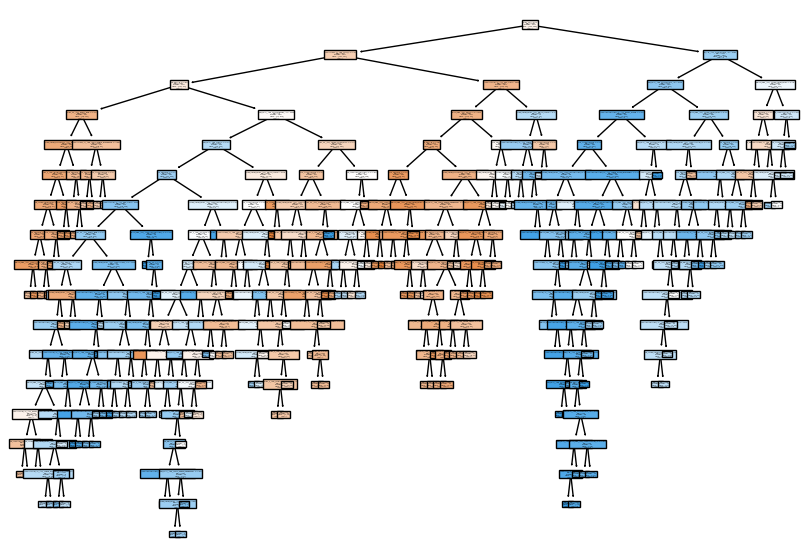

In [9]:
clf = tree.DecisionTreeClassifier(splitter='random', max_depth=100, min_samples_leaf=3)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                    feature_names= (features),
                    class_names= (prediction), 
                    filled=True)

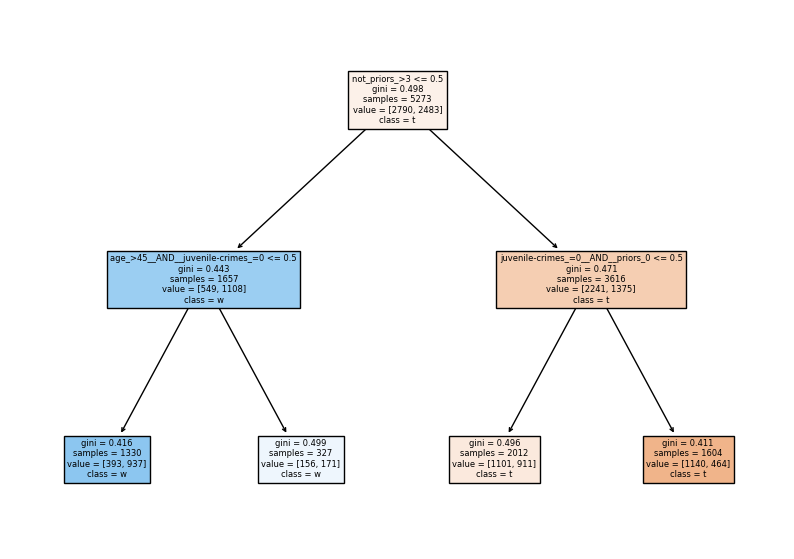

In [10]:
clf = tree.DecisionTreeClassifier(splitter='best', max_depth=2, min_samples_leaf=50)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                    feature_names= (features),
                    class_names= (prediction), 
                    filled=True)

**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.